## STAT 301 Statistical Modelling for Data Science



Tran Anh Thu Phung - Group 27

#### Import

In [1]:
library(tidyverse)
library(repr)
library(broom)
library(leaps)
library(moderndive)
library(gridExtra)
library(grid)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




#### 1. Introduction:

Stroke, a debilitating neurological condition, poses a significant global health concern (Pacheco‐Barrios et al.). It is the second leading cause of death and the third leading cause of disability worldwide, following heart disease. It is a major cause of mortality, morbidity and disability in developed and increasingly in less developed countries. Worldwide, it is the leading cause of healthy years lost in late adulthood, and evidence indicates that the burden of stroke, particularly in terms of morbidity and disability, will almost certainly increase in the foreseeable future (Kalache and Aboderin). This project delves into the critical task of stroke prediction, aiming to elucidate the intricate interplay between various demographic, health, and lifestyle factors.

Understanding the predictive markers for strokes is pivotal in implementing proactive healthcare measures and personalized interventions to mitigate potential risks. Gender, acknowledged for its role in healthcare disparities, can provide invaluable insights into stroke susceptibility, as well as how societal and biological differences may contribute to varied risk profiles. Age, a non-modifiable factor, often strongly correlates with stroke occurrence, serving as a fundamental parameter in risk assessment.

Moreover, underlying health conditions such as hypertension and heart disease, recognized as primary cardiovascular risk factors, play a pivotal role in predicting stroke incidence. Marital status, employment type, and residential factors may offer nuanced perspectives on socio-economic influences and their implications on health behaviours and access to care, potentially affecting stroke outcomes.

Furthermore, physiological indicators including glucose levels and BMI alongside lifestyle choices such as smoking habits intricately intertwine with an individual’s susceptibility to strokes. Their inclusion in predictive models can enhance risk assessment accuracy, facilitating tailored preventive strategies.

By synthesizing and analyzing these multifaceted factors, this project endeavours to contribute to advancing predictive models for stroke occurrence, paving the way for more targeted and effective preventive healthcare strategies.


#### Loading data

To read the dataset in R, we will read the dataset from the web into R.

I initially attempted to load the stroke dataset from the original source on the web, Kaggle, but there was no direct access to csv. file. To solve this problem, I have downloaded the dataset and uploaded it onto a public GitHub repository, from which we were able to access it from Jupyter Notebook.

In [2]:
url <- "https://raw.githubusercontent.com/Wendy1907/STAT_301_Stroke_Prediction_project/main/healthcare-dataset-stroke-data.csv"
df <- read_csv(url)
head(df)

Rows: 5110 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, ever_married, work_type, Residence_type, bmi, smoking_status
dbl (6): id, age, hypertension, heart_disease, avg_glucose_level, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


**1.3 Data Summary**

The dataset was collected from many hospitals of Bangladesh in the year of 2019, based on patient's various health condiitions, which is in the occurrence of stroke disease. 

There are total **5110 observations** and **12 different variables** in this dataset.

| Variable Name      | Type of Variable | Explanation |
| ----------- | :-----------: | ----------- |
| `id`     | dbl       | Unique identifier for each patient |
| `gender`   | chr        | Patient's gender, such as `"Male"`, `"Female"`, or `"Other"`|
| `age`   | dbl        | Age of the patient |
| `hypertention`   | dbl        | Binary feature, `0` if the patient does not have hypertension, `1` if the patient has hypertension|
| `heart_disease`   | dbl        | Binary feature, `0` if the patient does not have heart disease, `1` if the patient have heart disease|
| `ever_married`   | chr        | Binary feature, `"No"` if the patient never married, and`"Yes"` if the patient have already married|
| `work_type`   | chr        | Patient's current occupation|
| `Residence_type`   | chr        | Patient's residence type|
| `avg_glucose_level`   | dbl        | Patient's average glucose level in blood|
| `bmi`   | chr        | Patient's body mass index with missing value `N/A`|
| `smoking_status`   | chr        | Patient's smoking status with missing value `Unknown`|
| `stroke`   | dbl        | Binary feature, `0` if the patient had not have a stroke and `1` if had |


#### 2. Question:

>**"How do various factors such as gender, age, hypertension, heart disease, marital status, employment type, residence, glucose levels, body mass index, and smoking habits influence the likelihood of a patient experiencing a stroke?"**

#### 3. Cleaning and Wrangling the dataset:

**3.1 Cleaning the dataset**

***3.1.1 Finding Null variables***

First, we have to check if the data contains any null or N/A value or not.

- BMI:

In [3]:
length(which(df$bmi == "N/A"))

[1] 201

The funcion `is.na` which whill identify the null value giving out the result that there is no null variables in our dataset. However, if we take a better look inside the data, we can see that there is 201 variables contains `N/A` values in `bmi` columns. Then, to deal with these null variables, we decided to drop them from the dataset.

In [4]:
df <- df[!(df$bmi == "N/A"),]

- Gender:

In [5]:
length(which(df$gender == "Other"))

[1] 1

In here, we spotted that there is one value `Other` in the `gender` columns, then, we decided to remove it from the dataset.

In [6]:
df <- df[!(df$gender == "Other"),]

- Smoking Status:

In [7]:
table(df$smoking_status)


formerly smoked    never smoked          smokes         Unknown 
            836            1852             737            1483 

In the `smoking_status` column, we can see that there is a large portion of `Unknown` variable in this data set, however, since the size is large, we can not drop this values and treat it as same as what we have done above, instead, we decided to keep them and treat it as one of the type inside smoking status.

***3.1.2 Finding duplicate values***

Next step, we are going to check whether the data have duplicate value or not.

In [8]:
sum(duplicated(df))

[1] 0

In this dataset, we can see that there is no duplicate value.

***3.1.3 Convert variables type***

As we can see that the `bmi` conlumn contains numeric value, however, the column type is `chr` so wee need to change the column type for `bmi`. Moreover, since the `stroke`, `hypertension`, `heart_disease` column have binary values which represent if that patient having those health issues or not, then, we change those columns type into factor.

In [9]:
df_cleaned <- df %>%
mutate (bmi = as.numeric(bmi), 
        stroke = factor(stroke),
       hypertension = factor(hypertension),
        heart_disease = factor(heart_disease)) %>%
rename("residence_type" = "Residence_type")

Then, we have got a clean dataset. The clean dataset that we have gained is contain total of **4908 observations and 12 different columns**.

In [10]:
head(df_cleaned)

id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<fct>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


**3.2 Wrangling the Stroke Prediction data**

Since our question focus on factors such as `gender`,`age`, `hypertension`, `heart_disease`, `ever_married`,`work_type`, `residence_type`,`avg_glucose_level`, `bmi`, `smoking_status`,`gender`, and the target `stroke`, then we only interested in those columns to predict the likelihood of experiencing a stroke.

In [11]:
data <- df_cleaned %>%
select(-id)
head(data)

gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
<chr>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<fct>
Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


#### 4. Exploratory Data Analysis:

We perform an explanatory data analysis on the stroke dataset to summarize the main characteristics and to get a better understanding of the data.

First, we will explore the detail information of the continuous variables inside of the data.

In [12]:
data_cont <- data %>% select(age, avg_glucose_level, bmi)
head(data_cont)

age,avg_glucose_level,bmi
<dbl>,<dbl>,<dbl>
67,228.69,36.6
80,105.92,32.5
49,171.23,34.4
79,174.12,24.0
81,186.21,29.0
74,70.09,27.4


In [13]:
summary(data_cont)

      age        avg_glucose_level      bmi       
 Min.   : 0.08   Min.   : 55.12    Min.   :10.30  
 1st Qu.:25.00   1st Qu.: 77.07    1st Qu.:23.50  
 Median :44.00   Median : 91.68    Median :28.10  
 Mean   :42.87   Mean   :105.30    Mean   :28.89  
 3rd Qu.:60.00   3rd Qu.:113.50    3rd Qu.:33.10  
 Max.   :82.00   Max.   :271.74    Max.   :97.60  

Since we are planning to forecast an individual's likelihood of experiencing a stroke by analyzing factors such as age, hypertension, heart disease presence, average glucose level, BMI, smoking habits, and gender, then we want to explore the relationship between those factors. Those boxplots will compare the differences between people who had experienced stroke and those who haven't through categorical factors `gender`, `hypertension`, `heart_disease`, `ever_married`,`work_type`, `residence_type`,`smoking_status`, and continuous variables `age`, `avg_glucose_level`, `bmi`, with additional infomation of mean and IQR show on plots.

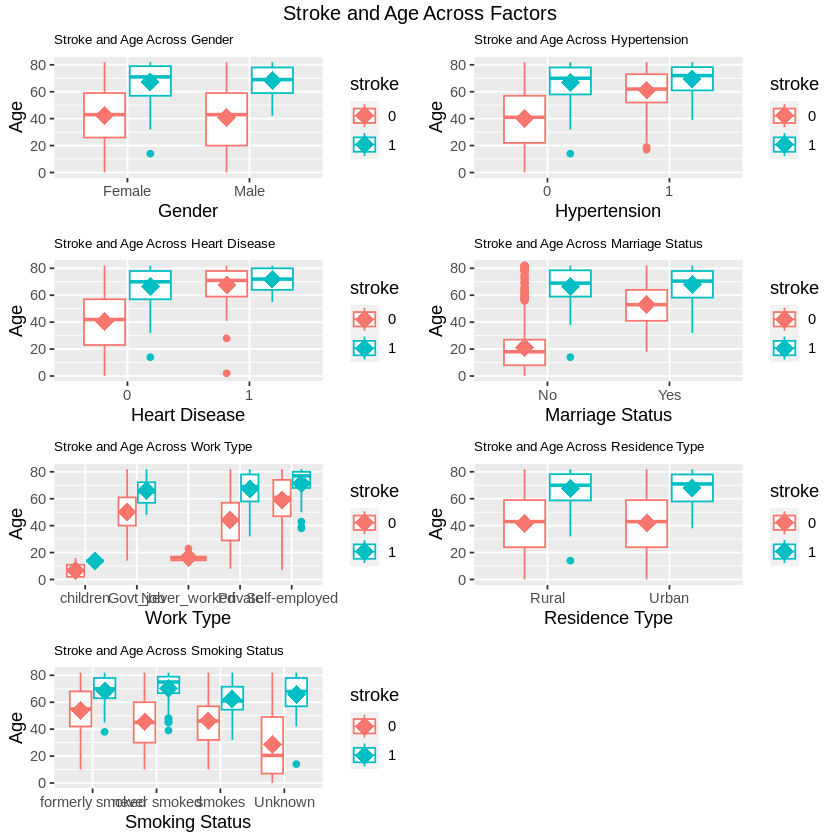

In [14]:
plot1  <- data %>%
ggplot(aes(x = gender, y = age, color = stroke)) + 
geom_boxplot() +
xlab("Gender") + 
ylab("Age") + 
ggtitle("Stroke and Age Across Gender") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(gender, age, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot2  <- data %>%
ggplot(aes(x = hypertension, y = age, color = stroke)) + 
geom_boxplot() +
xlab("Hypertension") + 
ylab("Age") + 
ggtitle("Stroke and Age Across Hypertension") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(hypertension, age, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot3  <- data %>%
ggplot(aes(x = heart_disease, y = age, color = stroke)) + 
geom_boxplot() +
xlab("Heart Disease") + 
ylab("Age") + 
ggtitle("Stroke and Age Across Heart Disease") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(heart_disease, age, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot4  <- data %>%
ggplot(aes(x = ever_married, y = age, color = stroke)) + 
geom_boxplot() +
xlab("Marriage Status") + 
ylab("Age") + 
ggtitle("Stroke and Age Across Marriage Status") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(ever_married, age, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot5  <- data %>%
ggplot(aes(x = work_type, y = age, color = stroke)) + 
geom_boxplot() +
xlab("Work Type") + 
ylab("Age") + 
ggtitle("Stroke and Age Across Work Type") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(work_type, age, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )
plot6  <- data %>%
ggplot(aes(x = residence_type, y = age, color = stroke)) + 
geom_boxplot() +
xlab("Residence Type") + 
ylab("Age") + 
ggtitle("Stroke and Age Across Residence Type") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(residence_type, age, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot7  <- data %>%
ggplot(aes(x = smoking_status, y = age, color = stroke)) + 
geom_boxplot() +
xlab("Smoking Status") + 
ylab("Age") + 
ggtitle("Stroke and Age Across Smoking Status") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(smoking_status, age, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

grid.arrange(plot1,plot2,plot3,plot4,plot5, plot6, plot7, ncol=2, nrow=4, top = "Stroke and Age Across Factors") 

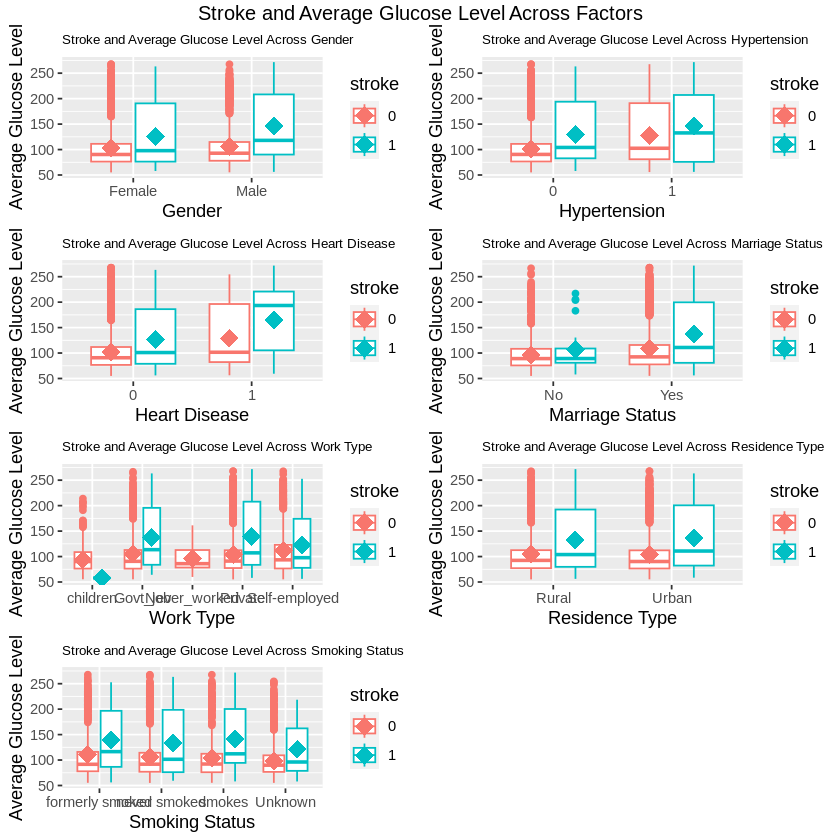

In [15]:
plot8  <- data %>%
ggplot(aes(x = gender, y = avg_glucose_level, color = stroke)) + 
geom_boxplot() +
xlab("Gender") + 
ylab("Average Glucose Level") + 
ggtitle("Stroke and Average Glucose Level Across Gender") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(gender, avg_glucose_level, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot9  <- data %>%
ggplot(aes(x = hypertension, y = avg_glucose_level, color = stroke)) + 
geom_boxplot() +
xlab("Hypertension") + 
ylab("Average Glucose Level") + 
ggtitle("Stroke and Average Glucose Level Across Hypertension") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(hypertension, avg_glucose_level, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot10  <- data %>%
ggplot(aes(x = heart_disease, y = avg_glucose_level, color = stroke)) + 
geom_boxplot() +
xlab("Heart Disease") + 
ylab("Average Glucose Level") + 
ggtitle("Stroke and Average Glucose Level Across Heart Disease") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(heart_disease, avg_glucose_level, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot11  <- data %>%
ggplot(aes(x = ever_married, y = avg_glucose_level, color = stroke)) + 
geom_boxplot() +
xlab("Marriage Status") + 
ylab("Average Glucose Level") + 
ggtitle("Stroke and Average Glucose Level Across Marriage Status") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(ever_married, avg_glucose_level, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot12  <- data %>%
ggplot(aes(x = work_type, y = avg_glucose_level, color = stroke)) + 
geom_boxplot() +
xlab("Work Type") + 
ylab("Average Glucose Level") + 
ggtitle("Stroke and Average Glucose Level Across Work Type") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(work_type, avg_glucose_level, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot13  <- data %>%
ggplot(aes(x = residence_type, y = avg_glucose_level, color = stroke)) + 
geom_boxplot() +
xlab("Residence Type") + 
ylab("Average Glucose Level") + 
ggtitle("Stroke and Average Glucose Level Across Residence Type") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(residence_type, avg_glucose_level, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot14  <- data %>%
ggplot(aes(x = smoking_status, y = avg_glucose_level, color = stroke)) + 
geom_boxplot() +
xlab("Smoking Status") + 
ylab("Average Glucose Level") + 
ggtitle("Stroke and Average Glucose Level Across Smoking Status") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(smoking_status, avg_glucose_level, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )
grid.arrange(plot8,plot9,plot10,plot11,plot12, plot13,plot14, ncol=2, nrow=4, top = "Stroke and Average Glucose Level Across Factors") 


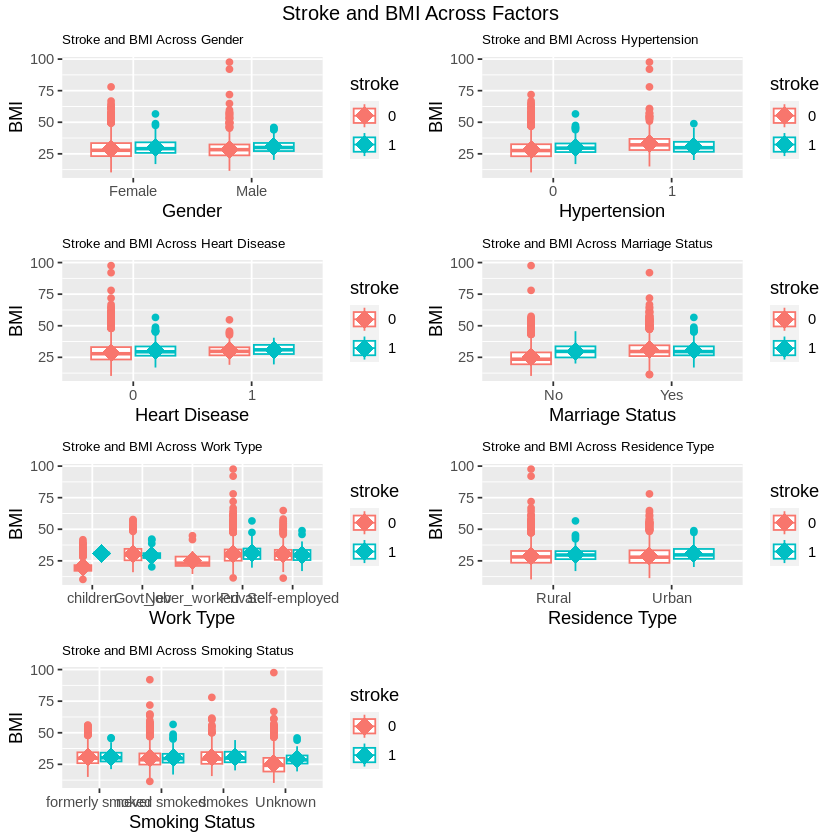

In [16]:
plot15  <- data %>%
ggplot(aes(x = gender, y = bmi, color = stroke)) + 
geom_boxplot() +
xlab("Gender") + 
ylab("BMI") + 
ggtitle("Stroke and BMI Across Gender") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(gender, bmi, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot16  <- data %>%
ggplot(aes(x = hypertension, y = bmi, color = stroke)) + 
geom_boxplot() +
xlab("Hypertension") + 
ylab("BMI") + 
ggtitle("Stroke and BMI Across Hypertension") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(hypertension, bmi, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot17  <- data %>%
ggplot(aes(x = heart_disease, y = bmi, color = stroke)) + 
geom_boxplot() +
xlab("Heart Disease") + 
ylab("BMI") + 
ggtitle("Stroke and BMI Across Heart Disease") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(heart_disease, bmi, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot18  <- data %>%
ggplot(aes(x = ever_married, y = bmi, color = stroke)) + 
geom_boxplot() +
xlab("Marriage Status") + 
ylab("BMI") + 
ggtitle("Stroke and BMI Across Marriage Status") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(ever_married, bmi, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot19  <- data %>%
ggplot(aes(x = work_type, y = bmi, color = stroke)) + 
geom_boxplot() +
xlab("Work Type") + 
ylab("BMI") + 
ggtitle("Stroke and BMI Across Work Type") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(work_type, bmi, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot20  <- data %>%
ggplot(aes(x = residence_type, y = bmi, color = stroke)) + 
geom_boxplot() +
xlab("Residence Type") + 
ylab("BMI") + 
ggtitle("Stroke and BMI Across Residence Type") + 
theme(plot.title = element_text(size=8)) +
stat_summary(aes(residence_type, bmi, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

plot21  <- data %>%
ggplot(aes(x = smoking_status, y = bmi, color = stroke)) + 
geom_boxplot() +
xlab("Smoking Status") + 
ylab("BMI") + 
ggtitle("Stroke and BMI Across Smoking Status") +
theme(plot.title = element_text(size=8)) +
stat_summary(aes(smoking_status, bmi, fill = stroke),
    fun = mean, geom = "point",
    shape = 18, size = 5, position = position_dodge(width = 0.75)
  )

grid.arrange(plot15,plot16,plot17,plot18,plot19, plot20, plot21, ncol=2, nrow=4,  top = "Stroke and BMI Across Factors")